# Gaussian Process

## Model Specification

A Gaussian process is defined as a probability distribution over functions $y(x)$ such that the set of values of $y(x)$ evaluated at an arbitrary finite set of points $x_1,\dots, x_N$ jointly have a Gaussian distribution. 

A key point about Gaussian stochastic processes is that the joint distribution over $N$ variables $y_1,\dots, y_N$ is specified completely by the second-order statistics, namely the mean and the covariance. For means, generally we have
\begin{align}
E(y_n)=m(x_n).
\end{align}
In most applications, we will not have any prior knowledge about the mean of $y(x)$ and so by symmetry we take it to be $0$. 

The specification of the Gaussian process is then completed by giving the covariance of $y(x)$ evaluated at any two values of $x$, which is given by the kernel function
\begin{align}
E[y(x_n)y(x_m)]=k(x_n, x_m).
\end{align}
Here $k$ is a kernel function, which can be derived from specifying features, as can be done in the [SVM](SVM.ipynb); or better yet, as is also more likely done in SVM, one can directly specify a kernel function. 

In summary, we usually have
\begin{align}
p(y)=N(y_{1:N}|0, K_N).
\end{align}
The kernel function that determines $K$ is typically chosen to express the property that, for points $x_n$ and $x_m$ that are similar, the corresponding values $y(x_n)$ and $y(x_m)$ will be more strongly correlated than for dissimilar points. In this way, the correlation of $y$ implicitly depends on $x$.

In order to apply Gaussian process models to the problem of regression, we need to take account of the noise on the observed target values, which are given by
\begin{align}
t_n=y_n+\epsilon_n,
\end{align}
where $\epsilon_n\sim N(0, \beta^{-1})$. Thus, the marginal distribution of $t$ is given by
\begin{align}
p(t_{1:N})=N(t_{1:N}|0,C_N),
\end{align}
where $C_N$ has elements
\begin{align}
C(x_n, x_m)=k(x_n, x_m)+\beta^{-1}\delta_{nm}.
\end{align}

To solve the Gaussian process, we need to have the predictive distribution $p(t_{N+1}|t_{1:N})$, which is a classical result of multivariate Gaussian. Indeed, let
\begin{align}
C_{N+1}=\begin{pmatrix}
C_{N} & \mathbb{k} \\
\mathbb{k} & c
\end{pmatrix},
\end{align}
where $\mathbb{k}$ has elements $k(x_n, x_{N+1})$ for $n=1,\dots, N$ and the scaler $c=k(x_{N+1},x_{N+1})+\beta^{-1}$. As such, $p(t_{N+1}|t_{1:N})$ is given by 
\begin{align}
m(x_{N+1})=\mathbb{k}^TC_N^{-1}t_{1:N},
\sigma^2(x_{N+1})=c-\mathbb{k}^TC_N^{-1}\mathbb{k}
\end{align}

### Choosing Kernels

A *stationary* covariance function is a function of $x − x'$. Thus it is invariant stationarity to translations in the input space. If further the covariance function is a function only of $|x − x'|$, then it is called isotropic; it is thus invariant to all rigid motions, including rotations.

#### Constant kernels

Basically the kernel is constant everywhere. In `sklearn`, this is specified as `ConstantKernel`, which can be used as part of a `Product` kernel where it scales the magnitude of the other factor (kernel) as part of a `Sum` kernel.

#### White kernels

It posits that all variances come from noise, and there is no cross-sectional correlation between different `x`, whether it in intrinsic `x` or noise. 

#### Dot-Product kernels

The `DotProduct` kernel is non-stationary and can be viewed as obtained from linear regression by putting $N(0,1)$ priors on the coefficients of $x_n$ and a prior of $N(0,\sigma_0^2)$ on the bias. The kernel is given by
\begin{align}
k(x_i, x_j)=\sigma_0^2+x_i\dot x_j
\end{align}

#### Radial-Basis function (RBF) kernel

The RBF kernel (`RBF` in `sklearn`) is a stationary kernel. It is also known as the 'squared exponential' kernel. It is parameterized by a length-scale parameter $l>0$, which can either be a scalar (isotropic variant of the kernel) or a vector with the same number of dimensions as the inputs  (anisotropic variant of the kernel). The kernel is given by
\begin{align}
k(x_i, x_j)=\exp\left(-\frac{d(x_i, x_j)^2}{2l^2}\right)
\end{align}

#### Matern kernel

A generalization of both the RBF kernel and the absolute exponential kernel. It is stationary.

#### Rational quadratic kernel

The `RationalQuadratic` kernel can be seen as a scale mixture (an infinite sum) of RBF kernels with different characteristic length-scales. It is parameterized by a length-scale parameter $l>0$ and a scale mixture parameter $\alpha>0$. Only the isotropic variant where $l$ is a scalar is supported at the moment in `sklearn`. The kernel is given by:
\begin{align}
k(x_i, x_j)=\left(1+\frac{d(x_i, x_j)^2}{2\alpha l^2}\right)^{-\alpha}
\end{align}

#### Exp-Sine-Squared kernel

The `ExpSineSquared` kernel allows modeling periodic functions. It is parameterized by a length-scale parameter $l>0$ and a periodicity parameter $p>0$. Only the isotropic variant where  is a scalar is supported in `sklearn` at the moment. The kernel is given by:
\begin{align}
k(x_n, x_m)=\exp\left(-\frac{2\sin^2(\pi d(x_i, x_j)/p)}{l^2}\right)
\end{align}

#### Comments on kernels

**Combining kernels**

As aforementioned, different kernel functions are better at modeling a certain aspect of the model, e.g. seasonality by the exp-sine kernels, etc., in practice one can combine different kernels, making use of the fact that a positive linear combination of kernels are still kernels. One widely used kernel function for Gaussian process regression is given by the exponential of a quadratic form, with the addition of constant and linear terms to give
\begin{align}
k(x_n, x_m)=\theta_0\exp\{-\frac{\theta_1}{2}||x_n-x_m||^2\}+\theta_2+\theta_3x_n^{T}x_m.
\end{align}
Note that the term involving $\theta_3$ corresponds to a parametric model that is a linear function of the input variables. 

One can also impose a structure in the noise process by combining the kernel amongst $\epsilon$, rather than just positing they are white, as this example shows: Mauna Loa Atmosphere Carbon Dioxide, in Section 5.4.3. in RW2006.

**Automatic Relevance Determinination**

When the kernel amongst $x$ is chosen to be diagonal, with different hyperparameters, or length scales, for each dimension of $x$, by learning this hyperparameters, one essentially performs a feature selection exercise, which is called automatic relevance determination in GP lingo; see learning hyperparameters below. The larger the learned parameter on length scale on one dimension, the less important this dimension is in the final log likelihood, in a sense the feature is de-selected.

### Learning the Hyperparameters

In practice, rather than fixing the covariance function, we may prefer to use a parametric family of functions and then infer the parameter values from the data. These parameters govern such things as the length scale of the correlations and the precision of the noise and correspond to the hyperparameters in a standard parametric model. 

#### Maximum Likelihood

The simplest approach is to make a point estimate of θ by maximizing the log likelihood function. In the sense that MLE can be viewed as a special case as maximizing posterior mode, the terminology seems to refer to likelihood using pre-optimizing $\theta$ as 'prior', while post-optimization (taking into account the data) as 'posterior'. In a fully Bayesian treatment, we need to evaluate marginals over $\theta$ weighted by the product of the prior $p(\theta)$ and the likelihood function $p(t|\theta)$. 

By inspecting the learned parameters, one can tell a story about the learned model and the data. But one thing that people should pay attention to is multiple local optima, as depicted in the following example (Mauna Loa Atmosphere Carbon Dioxide, in Section 5.4.3. in RW2006). In the global optima (panel (b)), the 7 sample points are fitted by the 'signal kernel', for which the posterior mean seems a meaningful shape, and posterior variance decreases and increases according to distance to the sample points - indeed, the length scale parameter is small while noise variance is small. On the other hand, in a local optima, the fitting leaves everything on noise: length scale parameter are large (meaning no $x$ is relevant) and the noice variance is large. 

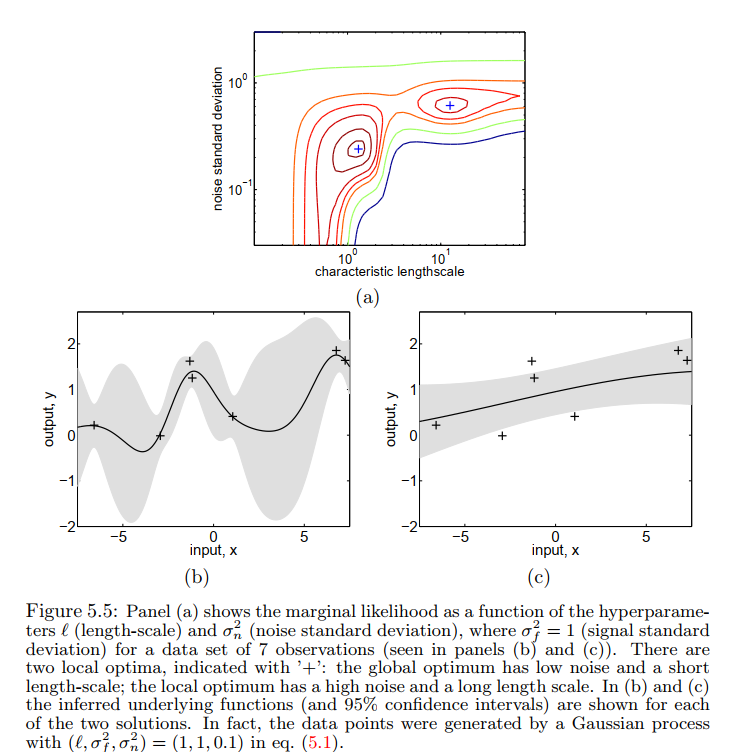

**LOOCV**

Another approach to determine hyperparameters is through cross validation. In GP context, it is easier in concept to do LOOCV, appealing to conditional Gaussian likelihood formulas. Computational-wise, we need the inverses of covariance matrices with a single column and row removed in turn. This can be computed efficiently from the inverse of the complete covariance matrix using inversion by partitioning - so this requires the inverse of covariance matrix as well.

As for loss functions, it is advised to use negative log likelihood rather than the simple square error, since the former takes into account variance.

Comparing MLE with LOOCV, note that asymptotically the computation burden is compariable. On the other hand, it is interesting to note that the marginal likelihood tells us the probability of the observations given the assumptions of the model. This contrasts with the frequentist LOO-CV value, which gives an estimate for the (log) predictive probability, whether or not the assumptions of the model may be fulfilled. Thus it has been argued that CV procedures should be more robust against model mis-specification.

### Variants and Generalizations

- In cases where the input vector x is two dimensional, this may also be known as a **Gaussian random field**.

- The are some extra steps applied so that Gaussian process can be used for classifications as well; see Sections 6.4.5 and 6.4.6 in Bishop (2006).

## Theoretical Properties

### Advantages

- The prediction interpolates the observations (at least for regular kernels).

- The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals and decide based on those if one should refit (online fitting, adaptive fitting) the prediction in some region of interest.

- Versatile: different kernels can be specified. Common kernels are provided, but it is also possible to specify custom kernels.

### Disadvantages

- They are not sparse, i.e., being a non-parametric model, they use the whole samples/features information to perform the prediction. 

- Since prediction and MLE to learn hyperparameters requires inverting covariance matrix (which is usually an $O(n^3)$ operation), Gaussian process cannot be used in an online fashion.

- They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens.

### Relation to Other Models

Gaussian Process is related to a wide class of models, such as
- Bayesian linear regression
- Kriging in geostatistics
- ARMA in time series analysis

There is also connection and some asymptotic relation between Gaussian process and neural network, in the limit of the number of neurons tends to infinity; see 6.4.7 in Bishop (2006).

## Empirical Performance

After the hyperparameter optimization, posterior variance is usually small near the sample points, and gradually enlarge when it is farther away. This is intuitive when the sample arrives subsequently, i.e. when one of the $x$ is time, in that once a signal arrives, the uncertainty should shrink.

### Advantages and Disadvantages

## Implementation Details and Practical Tricks

In `sklearn`, the `GaussianProcessRegressor` implements Gaussian processes (GP) for regression purposes. For this, the prior of the GP needs to be specified. 

The prior mean is assumed to be constant and zero (for `normalize_y=False`) or the training data’s mean (for `normalize_y=True`). The prior's covariance is specified by passing a `kernel` object. The hyperparameters of the kernel are optimized during fitting of GaussianProcessRegressor by maximizing the log-marginal-likelihood (LML) based on the passed `optimizer`. As the LML may have multiple local optima, the optimizer can be started repeatedly by specifying `n_restarts_optimizer`. The first run is always conducted starting from the initial hyperparameter values of the kernel; subsequent runs are conducted from hyperparameter values that have been chosen randomly from the range of allowed values. If the initial hyperparameters should be kept fixed, `None` can be passed as `optimizer`.

The noise level in the targets can be specified by passing it via the parameter alpha, either globally as a scalar or per datapoint. Note that a moderate noise level can also be helpful for dealing with numeric issues during fitting as it is effectively implemented as Tikhonov regularization, i.e., by adding it to the diagonal of the kernel matrix. An alternative to specifying the noise level explicitly is to include a WhiteKernel component into the kernel, which can estimate the global noise level from the data (see example below).

The implementation is based on Algorithm 2.1 of RW2006.

In [1]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X, y)
gpr.predict(X[:2,:], return_std=True)

(array([653.08792288, 592.16905327]), array([316.68016218, 316.65121679]))

**Selected Parameters**

- **`kernel: kernel instance, default=None`**

  The kernel specifying the covariance function of the GP. If None is passed, the kernel `1.0 * RBF(1.0)` is used as default (probably what is referred to as prior in the example figures). Note that the kernel’s hyperparameters are optimized during fitting.
  
  
- **`alpha: float or array-like of shape (n_samples), default=1e-10`**

  Value added to the diagonal of the kernel matrix during fitting. Larger values correspond to increased noise level in the observations. This can also prevent a potential numerical issue during fitting, by ensuring that the calculated values form a positive definite matrix. If an array is passed, it must have the same number of entries as the data used for fitting and is used as datapoint-dependent noise level. Note that this is equivalent to adding a `WhiteKernel` with `c=alpha`. Allowing to specify the noise level directly as a parameter is mainly for convenience and for consistency with ridge regression.
  
  
- **`optimizer“fmin_l_bfgs_b” or callable, default=”fmin_l_bfgs_b”`**

  Can either be one of the internally supported optimizers for optimizing the kernel’s parameters, specified by a string, or an externally defined optimizer passed as a callable. If a callable is passed, it must have the signature: `def optimizer(obj_func, initial_theta, bounds)`.
  
  Per default, the ‘L-BGFS-B’ algorithm from scipy.optimize.minimize is used. If None is passed, the kernel’s parameters are kept fixed.
  
  
- **`n_restarts_optimizerint, default=0`**
  The number of restarts of the optimizer for finding the kernel’s parameters which maximize the log-marginal likelihood. The first run of the optimizer is performed from the kernel’s initial parameters, the remaining ones (if any) from thetas sampled log-uniform randomly from the space of allowed theta-values. If greater than 0, all bounds must be finite. Note that `n_restarts_optimizer == 0` implies that one run is performed.

**Selected Attributes**

- **`kernel_: kernel instance`**
  The kernel used for prediction. The structure of the kernel is the same as the one passed as parameter but with optimized hyperparameters. 
  
- **`log_marginal_likelihood_value_: float`**
  The log-marginal-likelihood of `self.kernel_.theta`

**Selected Methods**

- **`log_marginal_likelihood([theta, …])`**

  Returns log-marginal likelihood of theta for training data.
  
- **`predict(X[, return_std, return_cov])`**

  Predict using the Gaussian process regression model
  
- **`sample_y(X[, n_samples, random_state])`**

  Draw samples from Gaussian process and evaluate at `X`.

## Use Cases

## Results Interpretation, Metrics and Visualization

## References 
- < Pattern Recognition and Machine Learning >, Chapter 6.
- [`sklearn` Documentation of Gaussian Process](https://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels)
- Chapter 5 in < Gaussian Process >, GW2006.
### Further Reading
- Sections 6.4.5 and 6.4.6 in < Pattern Recognition and Machine Learning >, for Gaussian Process Classifications.
- Chapter 8 in < Gaussian Process >, GW2006.

## Misc.